Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


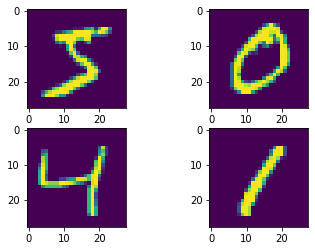

In [3]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0])
plt.subplot(222)
plt.imshow(X_train[1])
plt.subplot(223)
plt.imshow(X_train[2])
plt.subplot(224)
plt.imshow(X_train[3])
# show the plot
plt.show();

In [0]:
!pip install tensorflow==1.15
!pip install keras

In [17]:
# Baseline MLP for MNIST dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





 - 6s - loss: 0.2792 - acc: 0.9203 - val_loss: 0.1363 - val_acc: 0.9606
Epoch 2/10
 - 6s - loss: 0.1101 - acc: 0.9679 - val_loss: 0.0999 - val_acc: 0.9687
Epoch 3/10
 - 6s - loss: 0.0706 - acc: 0.9792 - val_loss: 0.0824 - val_acc: 0.9749
Epoch 4/10
 - 6s - loss: 0.0502 - acc: 0.9852 - val_loss: 0.0644 - val_acc: 0.9807
Epoch 5/10
 - 6s - loss: 0.0368 - acc: 0.9896 - val_loss: 0.0634 - val_acc: 0.9802
Epoch 6/10
 - 6s - loss: 0.0270 - acc: 0.9926 - val_loss: 0.0631 - val_acc: 0.9803
Epoch 7/10
 - 6s - loss: 0.0195 - acc: 0.9949 - val_loss: 0.0617 - val_acc: 0.9813
Epoch 8/10
 - 6s - loss: 0.0146 - acc: 0.9968 - val_loss: 0.0607 - val_acc: 0.9823
Epoch 9/10
 - 6s - loss: 0.0110 - acc: 0.9975 - val_loss: 0.0564 - val_acc: 0.9831
Epoch 10/10
 - 6s - loss: 0.0076 - acc: 0.9988 - val_loss: 0.0613 - val_acc: 0.9818
Baseline Error: 1

In [18]:
# Simple CNN for the MNIST Dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define a simple CNN model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 32s 535us/step - loss: 0.2285 - acc: 0.9360 - val_loss: 0.0730 - val_acc: 0.9771
Epoch 2/10
60000/60000 [==============================] - 32s 530us/step - loss: 0.0691 - acc: 0.9791 - val_loss: 0.0455 - val_acc: 0.9852
Epoch 3/10
60000/60000 [==============================] - 32s 529us/step - loss: 0.0494 - acc: 0.9848 - val_loss: 0.0457 - val_acc: 0.9847
Epoch 4/10
60000/60000 [==============================] - 32s 528us/step - loss: 0.0384 - acc: 0.9886 - val_loss: 0.0352 - val_acc: 0.9881
Epoch 5/10
60000/60000 [==============================] - 32s 528us/step - loss: 0.0323 - acc: 0.9898 - val_loss: 0.0326 - val_acc: 0.9897
Epoch 6/10
60000/60000 [==============================] - 31s 525us/step - loss: 0.0254 - acc: 0.9922 - val_loss: 0.0358 - val_acc: 0.987